<a href="https://colab.research.google.com/github/ktb702/AI260/blob/main/Chapter2_video1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow # need to import the patch to use imshow in collab notebooks

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
img = cv2.imread("abstract.jpg")

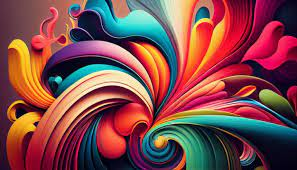

In [23]:
# can only view images inline in google collab, so you have to import the patch to assist with this
cv2_imshow(img)


In [6]:
cv2.imwrite("output.jpg", img) # can download this file from the toolbar on the left

True

In [7]:
import os
os.stat("abstract.jpg").st_size

13469

In [8]:
os.stat("output.jpg").st_size # the output is saved with a different compression algorithm.

29079

In [9]:
# there are some commands that don't work on google colab (like waitkey, etc)

In [10]:
type(img)

numpy.ndarray

In [7]:
len(img) # number of rows in the image

170

In [11]:
img.shape

(170, 297, 3)

In [ ]:
img[10,5] # uint8 means unsigned int base 8, so it's in a range btw 0 - 255 (rgb values)
# img[10, 5] means get the rgb values of the pixel that is in the 10th row and the 5th column

array([68, 52, 93], dtype=uint8)

In [12]:
# gives all the information for a channel
img[:,:,0]

array([[66, 66, 65, ..., 25, 25, 27],
       [66, 66, 65, ..., 26, 26, 27],
       [66, 66, 65, ..., 27, 27, 27],
       ...,
       [42, 42, 43, ..., 18, 18, 18],
       [39, 39, 42, ..., 18, 18, 18],
       [38, 38, 42, ..., 18, 18, 18]], dtype=uint8)

In [9]:
### Data Types and Structures ###

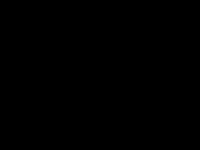

[0]


In [13]:
black = np.zeros([150, 200, 1], 'uint8')
cv2_imshow(black) # cv2_imshow only takes one argument, while cv2.imshow takes 2
print(black[0,0,:])

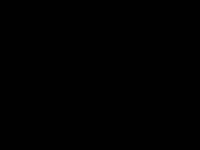

In [14]:
ones = np.ones([150,200,3], 'uint8')
cv2_imshow(ones)

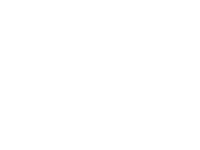

[65535 65535 65535]


In [15]:
white = np.ones([150,200,3], 'uint16')
white *= (2**16-1) # this equation indicates that we want to use the maximum value to see white pixels (255)
cv2_imshow(white)
print(white[0,0,:])

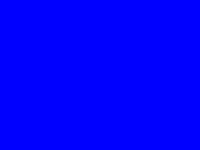

In [18]:
color = ones.copy()
color[:,:] = (255,0,0)
cv2_imshow(color)

In [1]:
## IMAGE TYPES AND COLOR CHANNELS ##

In [ ]:
# One important thing to note is that openCV stores color values as BGR, whereas other libraries
# like matplotlib (for example) expect the color values to be stored as RGB so the blue and red will be swapped.

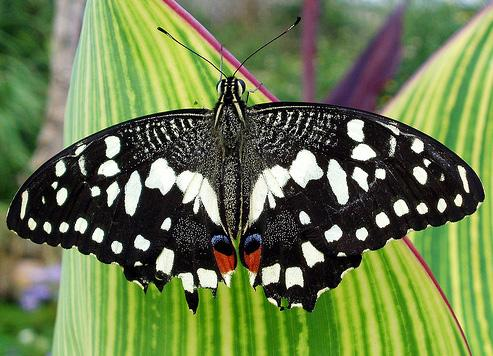

(356, 493, 3)


In [2]:
# passing a 1 as the second param specifies the IMREAD_COLOR flag, which loads the image in color. This is also the default so passing a second arg in this case is not necessary.
color = cv2.imread('butterfly.jpg', 1)
cv2_imshow(color)
print(color.shape)
height, width, channels = color.shape

In [29]:
## Here are some other commonly used flags that can be passed into the cv2.imread function ##
'''
    cv2.IMREAD_COLOR (or 1): Load the image in color (BGR).
    cv2.IMREAD_GRAYSCALE (or 0): Load the image in grayscale.
    cv2.IMREAD_UNCHANGED (or -1): Load the image as is, including any alpha channel (transparency) if present.
    cv2.IMREAD_ANYCOLOR (or 4): Load the image in any possible color format.
    cv2.IMREAD_ANYDEPTH (or 2): Load the image with the same depth as the source image.
    cv2.IMREAD_LOAD_GDAL (or 8): Load the image using the GDAL library.
    cv2.IMREAD_REDUCED_COLOR_2 (or 17): Load a reduced-size image in color (1/2).
    cv2.IMREAD_REDUCED_COLOR_4 (or 33): Load a reduced-size image in color (1/4).
    cv2.IMREAD_REDUCED_COLOR_8 (or 65): Load a reduced-size image in color (1/8).
    cv2.IMREAD_REDUCED_GRAYSCALE_2 (or 16): Load a reduced-size image in grayscale (1/2).
    cv2.IMREAD_REDUCED_GRAYSCALE_4 (or 32): Load a reduced-size image in grayscale (1/4).
    cv2.IMREAD_REDUCED_GRAYSCALE_8 (or 64): Load a reduced-size image in grayscale (1/8).
    '''

'\n    cv2.IMREAD_COLOR (or 1): Load the image in color (BGR).\n    cv2.IMREAD_GRAYSCALE (or 0): Load the image in grayscale.\n    cv2.IMREAD_UNCHANGED (or -1): Load the image as is, including any alpha channel (transparency) if present.\n    cv2.IMREAD_ANYCOLOR (or 4): Load the image in any possible color format.\n    cv2.IMREAD_ANYDEPTH (or 2): Load the image with the same depth as the source image.\n    cv2.IMREAD_LOAD_GDAL (or 8): Load the image using the GDAL library.\n    cv2.IMREAD_REDUCED_COLOR_2 (or 17): Load a reduced-size image in color (1/2).\n    cv2.IMREAD_REDUCED_COLOR_4 (or 33): Load a reduced-size image in color (1/4).\n    cv2.IMREAD_REDUCED_COLOR_8 (or 65): Load a reduced-size image in color (1/8).\n    cv2.IMREAD_REDUCED_GRAYSCALE_2 (or 16): Load a reduced-size image in grayscale (1/2).\n    cv2.IMREAD_REDUCED_GRAYSCALE_4 (or 32): Load a reduced-size image in grayscale (1/4).\n    cv2.IMREAD_REDUCED_GRAYSCALE_8 (or 64): Load a reduced-size image in grayscale (1/8).\

In [3]:
b, g, r = cv2.split(color)
print (f'b: {b}, g: {g}, r: {r}')

b: [[ 47  47  48 ... 170 172 174]
 [ 50  48  46 ... 171 173 174]
 [ 53  48  43 ... 168 171 172]
 ...
 [ 43  44  46 ... 103  94  88]
 [ 41  42  45 ... 103  95  92]
 [ 45  46  49 ... 103  97  96]], g: [[ 88  88  87 ... 150 151 150]
 [ 91  89  85 ... 150 151 151]
 [ 94  89  82 ... 149 152 153]
 ...
 [123 122 121 ... 223 214 205]
 [121 120 120 ... 223 217 209]
 [125 124 124 ... 223 219 213]], r: [[ 50  50  49 ... 145 154 162]
 [ 53  51  47 ... 149 156 165]
 [ 56  51  44 ... 152 161 168]
 ...
 [ 58  58  59 ... 218 203 190]
 [ 56  56  58 ... 218 206 194]
 [ 60  60  62 ... 218 208 198]]


In [5]:
rgb_split = np.empty([height, width*3, 3], 'uint8')
# take the entire height of the image and 0 to width
rgb_split[:, 0:width] = cv2.merge([b,b,b]) # this places blue channel fully on the left of the image.
rgb_split[:, width:width*2] = cv2.merge([g,g,g]) # this places the green channel in the middle third of the image.
rgb_split[:, width*2:width*3] = cv2.merge([r,r,r]) # this places the red channel fully on the right of the image.

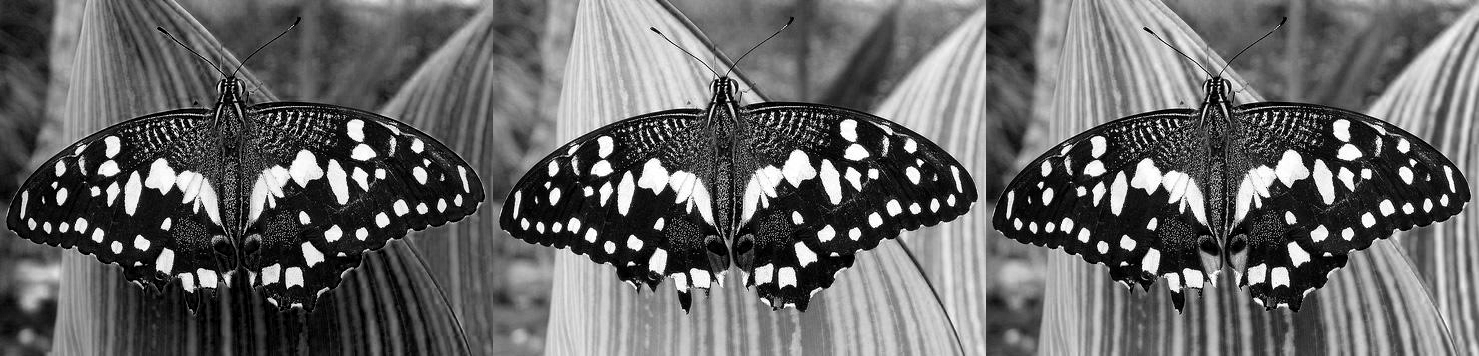

In [6]:
cv2_imshow(rgb_split)

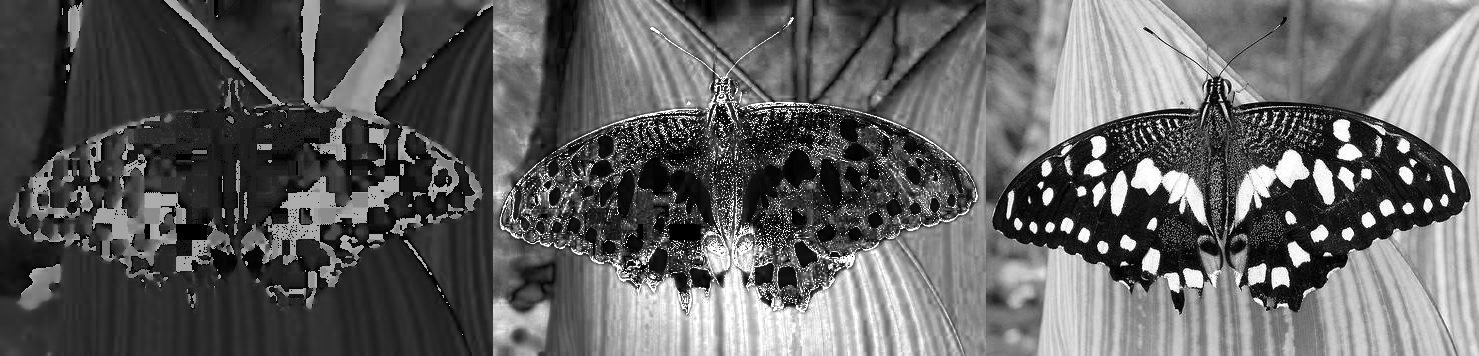

In [8]:
hsv = cv2.cvtColor(color, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
hsv_split = np.concatenate((h,s,v), axis=1) # axis 1 is the
cv2_imshow(hsv_split)

# left is the hue - indicates the type of color that we see in a 360 deg format
# middle is saturation - tells us how saturated an individual color is
# right is value - tells us how luminous the channel is.

In [9]:
### PIXEL MANIPULATION AND FILTERING ###

In [13]:
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
cv2.imwrite('gray.jpg', gray)

True

In [15]:
# this is a more efficient way of splitting the color channels than what we did in the example above.
b = color[:,:,0]
g = color[:,:,1]
r = color[:,:,2]

# the 4th channel here represents the transparency layer.
# We use an existing layer, and if we choose green that means that all of the non-green parts of the image will be transparent.
# Any pixel with a high green value (very green pixel) will show as the high alpha layer (meaning NOT transparent), and
#   any pixel with a low green value will show as fully transparent. What is the threshold?
rgba = cv2.merge((b,g,r,g))

# use a png for this because jpg doesn't support image transparency and will be compiled back down to a 3 channel image.
cv2.imwrite('rgba.png', rgba)

True

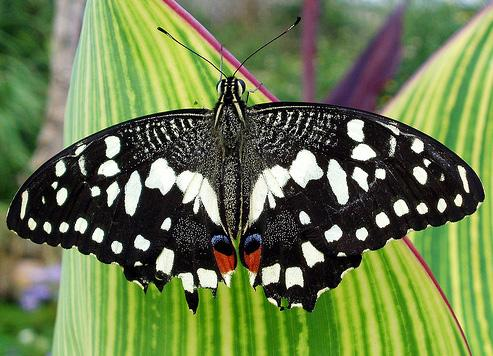

In [16]:
rgba = cv2.imread('rgba.png')
cv2_imshow(rgba)

In [1]:
# image transparency not working in google collab! :(

In [2]:
#### GAUSSIAN BLUR, DILATION, AND EROSION FILTERS ###

In [3]:
## Gaussian blur - method of smoothing an image by averaging pixel values with it's neighbors. Pixels that are closer to the target pixel
#      have a higher weight/effect than pixels that are further away. Used to smooth out noise as a precursor to additional processing.

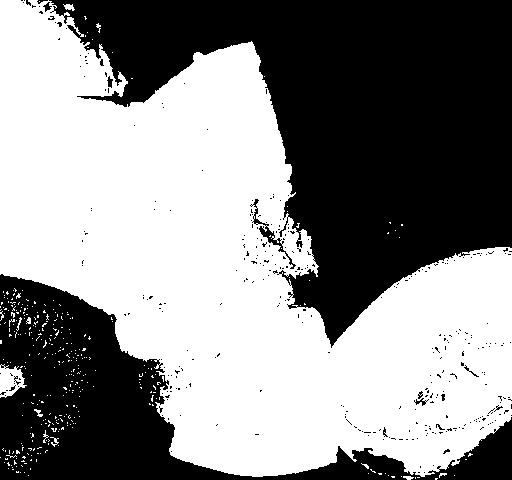

In [6]:
thresh = cv2.imread("thresh.jpg")
cv2_imshow(thresh)

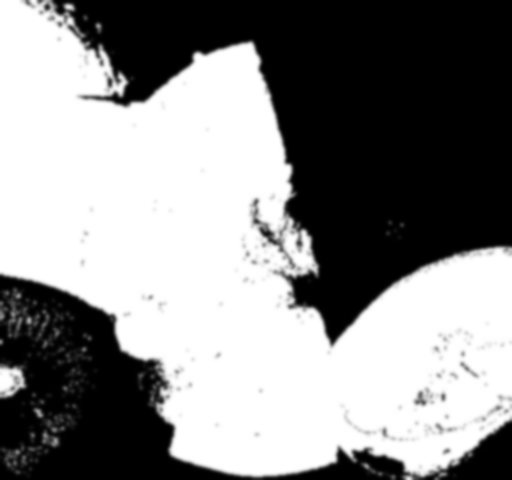

In [11]:
# 2nd parameter is the amount to blur in the x,y axes. Must be odd numbers.
blur = cv2.GaussianBlur(thresh, (9,9), 0)
cv2_imshow(blur)

In [12]:
# values passed must be odd values for the x,y axes
kernel = np.ones((5,5), 'uint8')

dilate = cv2.dilate(thresh, kernel, iterations=1)
erode = cv2.erode(thresh, kernel, iterations=1)

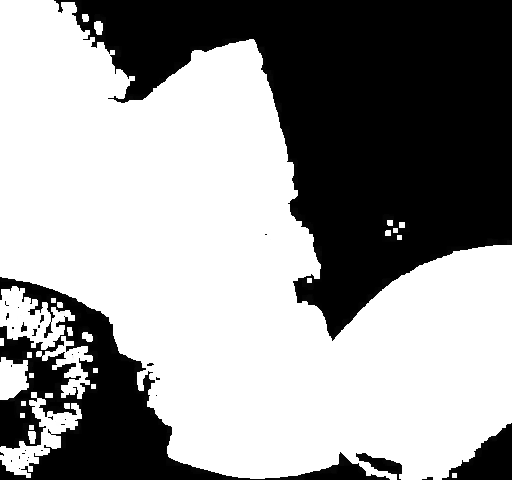

In [13]:
cv2_imshow(dilate)

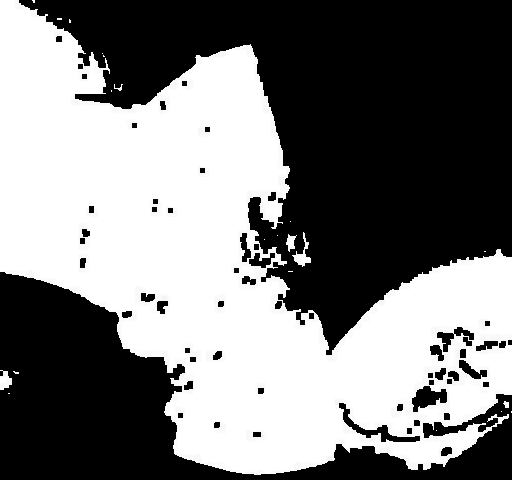

In [14]:
cv2_imshow(erode)

In [15]:
#### SCALE AND ROTATE IMAGES ###

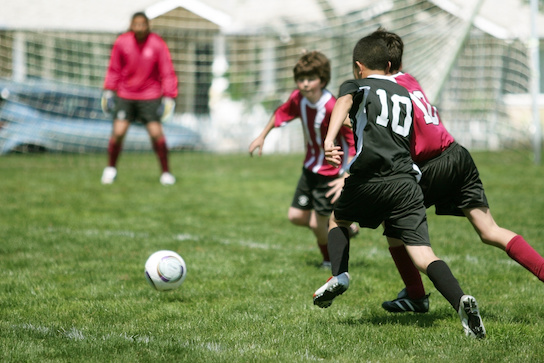

In [19]:
img = cv2.imread('players.jpg')
cv2_imshow(img)

In [17]:
# Scaling

# 2nd parameter is to set an absolute size of (x,y) or pass (0,0) to not set an absolute size.
# fx and fy are optional parameters that define the relative size. Using values of 0.5 will result in am image that is half the size of the original.
img_half = cv2.resize(img, (0,0), fx=0.5, fy=0.5)

# We will scale the image to the x,y dimensions of (600,600)
img_stretch = cv2.resize(img, (600,600))

# This will use the nearest interpolation instead of the default
img_stretch_near = cv2.resize(img, (600,600), interpolation=cv2.INTER_NEAREST)

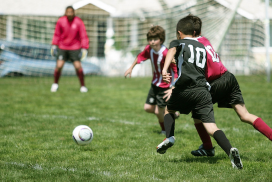

In [18]:
cv2_imshow(img_half)

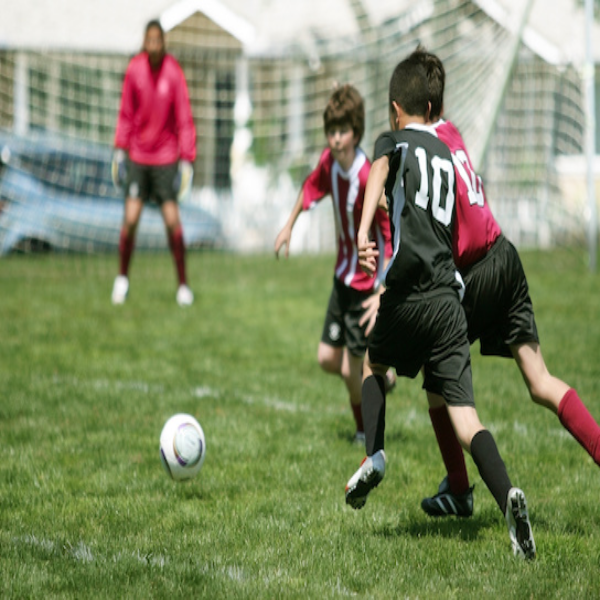

In [20]:
cv2_imshow(img_stretch)

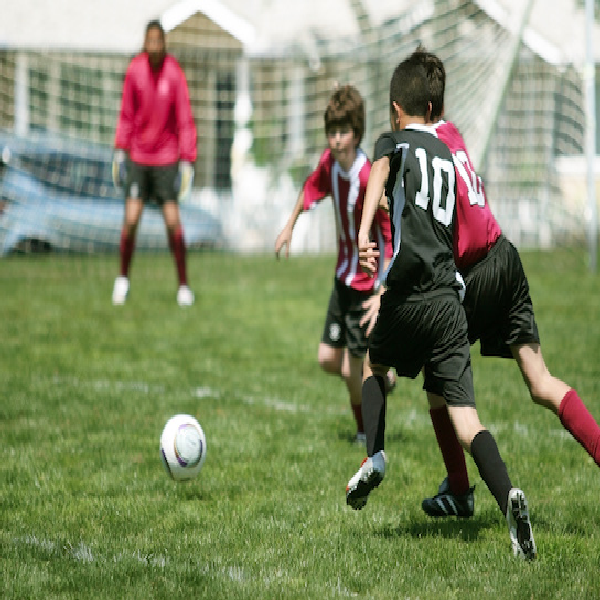

In [21]:
cv2_imshow(img_stretch_near)
# This image will look a little more pixelated because no interpolation was done during the scaling process.

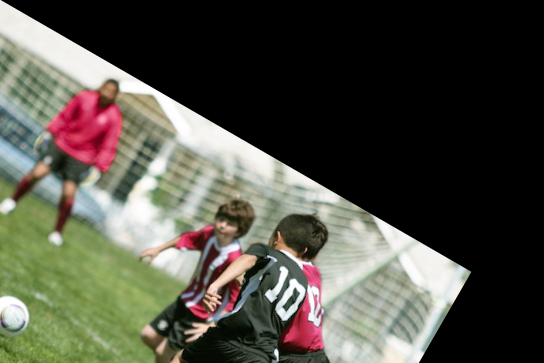

In [22]:
# Rotate

# capital M is the standard way of representation a matrix
# pass the location (x,y) that you want the rotation to happen around. Using (0,0) will rotate from the top left corner.
# Can also specify the degree we want the rotation to occur by (-30)
M = cv2.getRotationMatrix2D((0,0), -30, 1)

rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

cv2_imshow(rotated)